# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

* Computer vision is the practice of writing algorithm which can discover patterns in visual data

## Get the data

The images we're working with are from the Food101 dataset : https://www.kaggle.com/datasets/dansbecker/food-101

We've modified it to use only 2 classes : https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-22 14:50:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.5MB/s    in 4.6s    

2022-05-22 14:50:39 (22.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data and for a computer vision project this means visualizing many sample of your dataset.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the sub directories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the targer directory (we'll view images form here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['1026922.jpg']
Image shape: (306, 512, 3)


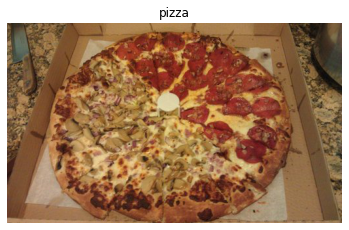

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[ 73,  54,  37],
        [ 77,  58,  41],
        [ 78,  57,  38],
        ...,
        [105,  77,  66],
        [ 97,  68,  60],
        [ 95,  66,  60]],

       [[ 86,  68,  48],
        [ 80,  59,  40],
        [ 79,  58,  39],
        ...,
        [102,  74,  63],
        [ 95,  66,  58],
        [ 94,  65,  59]],

       [[114,  93,  72],
        [ 85,  64,  43],
        [ 68,  47,  26],
        ...,
        [102,  74,  62],
        [ 97,  69,  58],
        [ 96,  69,  60]],

       ...,

       [[180, 136, 109],
        [181, 137, 108],
        [183, 139, 110],
        ...,
        [124,  94,  60],
        [113,  82,  51],
        [115,  84,  53]],

       [[181, 144, 115],
        [185, 148, 119],
        [169, 132, 103],
        ...,
        [127, 100,  70],
        [116,  91,  60],
        [124, 100,  66]],

       [[171, 134, 105],
        [170, 133, 104],
        [147, 110,  81],
        ...,
        [131, 104,  7

In [ ]:
# View the image shape
img.shape # return width, height, colour channels

(306, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.28627451, 0.21176471, 0.14509804],
        [0.30196078, 0.22745098, 0.16078431],
        [0.30588235, 0.22352941, 0.14901961],
        ...,
        [0.41176471, 0.30196078, 0.25882353],
        [0.38039216, 0.26666667, 0.23529412],
        [0.37254902, 0.25882353, 0.23529412]],

       [[0.3372549 , 0.26666667, 0.18823529],
        [0.31372549, 0.23137255, 0.15686275],
        [0.30980392, 0.22745098, 0.15294118],
        ...,
        [0.4       , 0.29019608, 0.24705882],
        [0.37254902, 0.25882353, 0.22745098],
        [0.36862745, 0.25490196, 0.23137255]],

       [[0.44705882, 0.36470588, 0.28235294],
        [0.33333333, 0.25098039, 0.16862745],
        [0.26666667, 0.18431373, 0.10196078],
        ...,
        [0.4       , 0.29019608, 0.24313725],
        [0.38039216, 0.27058824, 0.22745098],
        [0.37647059, 0.27058824, 0.23529412]],

       ...,

       [[0.70588235, 0.53333333, 0.42745098],
        [0.70980392, 0.5372549 , 0.42352941],
        [0.71764706, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images ⁉

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 267ms/step - loss: 0.6253 - accuracy: 0.6507 - val_loss: 0.5290 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4637 - accuracy: 0.7880 - val_loss: 0.3555 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4177 - accuracy: 0.8207 - val_loss: 0.4628 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4094 - accuracy: 0.8140 - val_loss: 0.3247 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3739 - accuracy: 0.8400 - val_loss: 0.3178 - val_accuracy: 0.8660


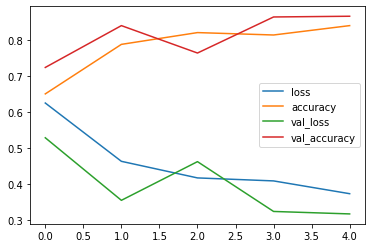

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 3s 166ms/step - loss: 0.3178 - accuracy: 0.8660


[0.3178239166736603, 0.8659999966621399]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 1.6964 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Despite having 20x more parameters model_2 is way worse than model_1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 2.2018 - accuracy: 0.6427 - val_loss: 0.6900 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.7207 - accuracy: 0.6853 - val_loss: 0.4584 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.5346 - accuracy: 0.7473 - val_loss: 0.5831 - val_accuracy: 0.6280
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5169 - accuracy: 0.7687 - val_loss: 0.5313 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6332 - accuracy: 0.7140 - val_loss: 0.7352 - val_accuracy: 0.6340


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification : Let's break it down

1. Become one with the data
2. Preprocess the data (prepare it for our model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data

['6926.jpg']
Image shape: (384, 512, 3)
['1717790.jpg']
Image shape: (512, 512, 3)


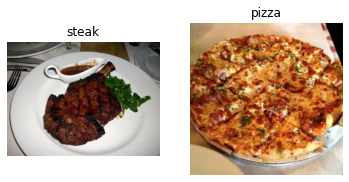

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all images at one time, a model might loook at 32 at a time.

All the images might not fit into the memory of the GPU

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, # Target directory
    target_size=(224, 224), # Target size of images (height, width)
    class_mode="binary", # Type of data you're working with
    batch_size=32 # size of minibatches to load into
)
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first to images
images[:2], images[0].shape

(array([[[[0.00392157, 0.00392157, 0.01176471],
          [0.00784314, 0.00784314, 0.01568628],
          [0.00392157, 0.00392157, 0.01176471],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.02352941, 0.02352941, 0.03137255],
          [0.01568628, 0.01568628, 0.02352941],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.02745098, 0.02745098, 0.03529412],
          [0.02352941, 0.02352941, 0.03137255],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         ...,
 
         [[0.        , 0.        , 0.00784314],
          [0.     

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a ML experiment

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3-layer convolutional neural network)
model_4 = Sequential([
  Conv2D(
      filters=10, # number of sliding windows going accross an input (higher=more complex)
      kernel_size=3,  # Size of your filters
      strides=1,
      padding="valid", # if same output shape is same as input shape, if valid output shape gets compressed
      activation="relu",
      input_shape=(224, 224, 3),# Input layer (specify input shape)
  ),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")                   
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lenghts of taining and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 257ms/step - loss: 0.7241 - accuracy: 0.7293 - val_loss: 0.4158 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.3968 - accuracy: 0.8300 - val_loss: 0.3934 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.2833 - accuracy: 0.8940 - val_loss: 0.3796 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.1269 - accuracy: 0.9647 - val_loss: 0.4417 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.0378 - accuracy: 0.9927 - val_loss: 0.5502 - val_accuracy: 0.7920


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 165ms/step - loss: 0.3178 - accuracy: 0.8660


[0.31782394647598267, 0.8659999966621399]

### 5. Evaluating our model

It looks like our model is learning something. Let's evaluate it

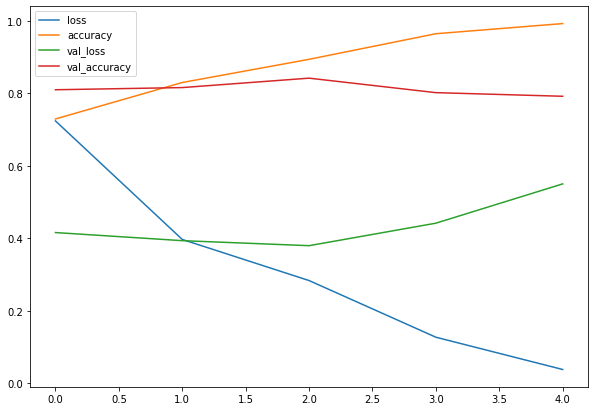

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

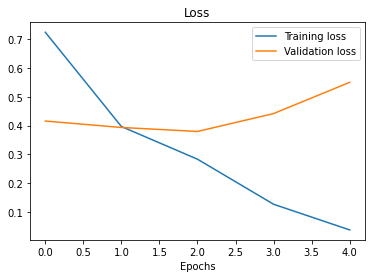

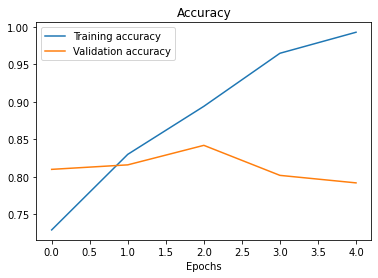

In [ ]:
# Check out the loss and accuracy of model 4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

In [ ]:
# Create the model (new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6552 - accuracy: 0.6100 - val_loss: 0.4803 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4733 - accuracy: 0.7720 - val_loss: 0.3856 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4465 - accuracy: 0.8047 - val_loss: 0.3860 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4256 - accuracy: 0.8160 - val_loss: 0.3857 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3955 - accuracy: 0.8220 - val_loss: 0.3458 - val_accuracy: 0.8620


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

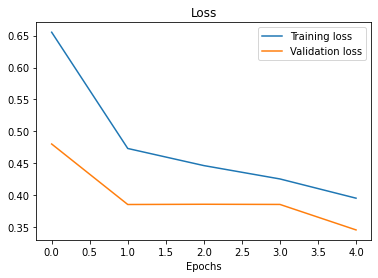

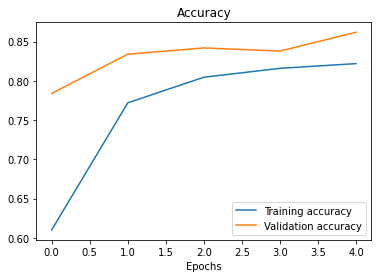

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, etc...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


Data augmentation is usually only performed on the training data.

In [ ]:
# Let's visualize some data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 19


(-0.5, 223.5, 223.5, -0.5)

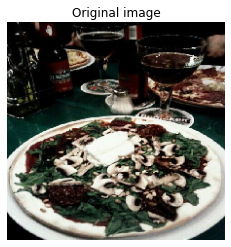

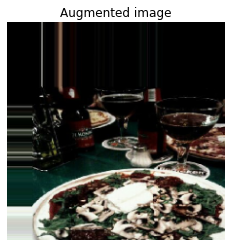

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # Our batch size is 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
# Create the model
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 563ms/step - loss: 0.7087 - accuracy: 0.3867 - val_loss: 0.6883 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 26s 563ms/step - loss: 0.6952 - accuracy: 0.5127 - val_loss: 0.6893 - val_accuracy: 0.6540
Epoch 3/5
47/47 [==============================] - 26s 559ms/step - loss: 0.6892 - accuracy: 0.6113 - val_loss: 0.6683 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 26s 559ms/step - loss: 0.6871 - accuracy: 0.5607 - val_loss: 0.6472 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6645 - accuracy: 0.6320 - val_loss: 0.6781 - val_accuracy: 0.6120


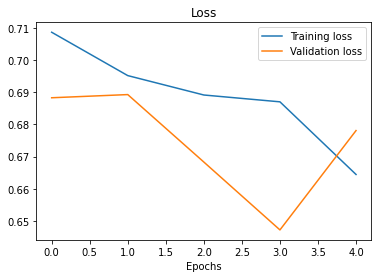

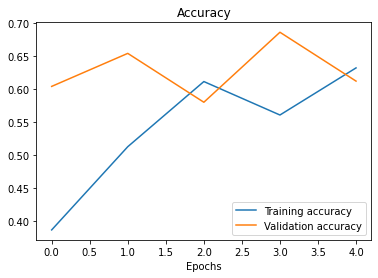

In [ ]:
# Plot the loss
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model

In [ ]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 564ms/step - loss: 0.6655 - accuracy: 0.5713 - val_loss: 0.6226 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5933 - accuracy: 0.6787 - val_loss: 0.4380 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 26s 555ms/step - loss: 0.5272 - accuracy: 0.7293 - val_loss: 0.3793 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 26s 556ms/step - loss: 0.5170 - accuracy: 0.7513 - val_loss: 0.3683 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 26s 556ms/step - loss: 0.4743 - accuracy: 0.7813 - val_loss: 0.3831 - val_accuracy: 0.8200


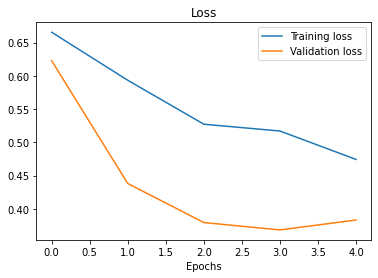

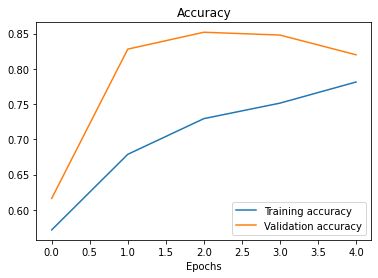

In [ ]:
# Plot the loss
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could do to improve our model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust for our own case

**Challenge:** Recreate the model on the CNN explainer website (model_1) and see how it performs on the augmented suffled training data.

In [ ]:
# Build a CNN model
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile our CNN
model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 585ms/step - loss: 0.6619 - accuracy: 0.5973 - val_loss: 0.5226 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 27s 580ms/step - loss: 0.5554 - accuracy: 0.7113 - val_loss: 0.4139 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.5195 - accuracy: 0.7427 - val_loss: 0.3955 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 27s 585ms/step - loss: 0.5107 - accuracy: 0.7553 - val_loss: 0.4189 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 28s 586ms/step - loss: 0.4887 - accuracy: 0.7740 - val_loss: 0.4452 - val_accuracy: 0.7940


### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-05-22 15:03:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-05-22 15:03:01 (27.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

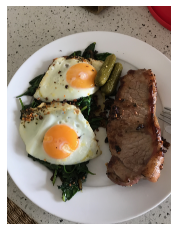

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

When you train a NN and you want to make a prediction with it on your own data, it's important that your data is preprocessed into the same format as the data of your model

In [ ]:
# Create a function to import an image and resize it to be able to use it with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and reshape it
  to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all value between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9063823]], dtype=float32)

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the probabilitie
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

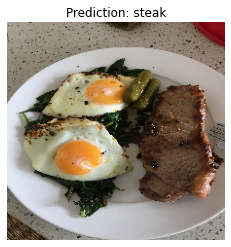

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-05-22 15:03:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-05-22 15:03:04 (35.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



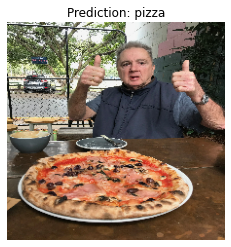

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

## Multi-class classification CNN

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-22 15:03:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.0MB/s    in 13s     

2022-05-22 15:03:20 (38.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
# Setp the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3465704.jpg']
Image shape: (512, 512, 3)


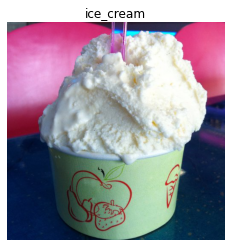

In [ ]:
# Visualize our data
import random
img  = view_random_image(target_dir=train_dir,
                         target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first to images
images[:2], images[0].shape

(array([[[[0.72156864, 0.65882355, 0.5686275 ],
          [0.72156864, 0.6509804 , 0.5647059 ],
          [0.7372549 , 0.67058825, 0.6       ],
          ...,
          [0.7411765 , 0.654902  , 0.49411768],
          [0.74509805, 0.6431373 , 0.5058824 ],
          [0.7176471 , 0.6039216 , 0.4784314 ]],
 
         [[0.7137255 , 0.654902  , 0.63529414],
          [0.7176471 , 0.6509804 , 0.61960787],
          [0.7254902 , 0.65882355, 0.5803922 ],
          ...,
          [0.654902  , 0.56078434, 0.41176474],
          [0.7019608 , 0.60784316, 0.47450984],
          [0.74509805, 0.654902  , 0.5294118 ]],
 
         [[0.7803922 , 0.72156864, 0.7960785 ],
          [0.7686275 , 0.7137255 , 0.8117648 ],
          [0.73333335, 0.6745098 , 0.7019608 ],
          ...,
          [0.62352943, 0.5058824 , 0.3647059 ],
          [0.62352943, 0.52156866, 0.3921569 ],
          [0.6666667 , 0.5764706 , 0.45098042]],
 
         ...,
 
         [[0.6901961 , 0.6156863 , 0.44705886],
          [0.69019

### 3. Create a model

In [ ]:
# Create a model
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 247ms/step - loss: 2.1982 - accuracy: 0.1861 - val_loss: 2.1124 - val_accuracy: 0.2248
Epoch 2/5
235/235 [==============================] - 57s 241ms/step - loss: 1.8624 - accuracy: 0.3561 - val_loss: 1.8945 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 1.4073 - accuracy: 0.5287 - val_loss: 2.0839 - val_accuracy: 0.3112
Epoch 4/5
235/235 [==============================] - 58s 245ms/step - loss: 0.7248 - accuracy: 0.7652 - val_loss: 2.6239 - val_accuracy: 0.2736
Epoch 5/5
235/235 [==============================] - 58s 247ms/step - loss: 0.2454 - accuracy: 0.9273 - val_loss: 4.0660 - val_accuracy: 0.2492


### 5. Evaluate the model

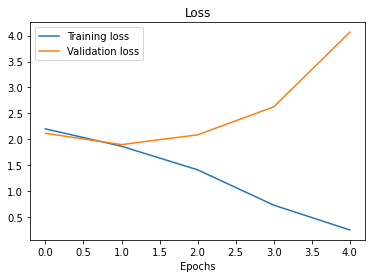

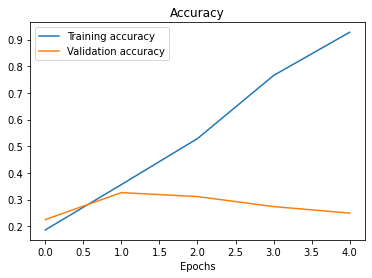

In [ ]:
# Plot loss curves
plot_loss_curves(history_9)

What do these loss curves tell us ? It seems our model is overfitting the training set. It get get result during training but fails to generalize on unseen data

### 6. Adjust the model hyperparameters (beat the baseline/reduce overfitting)

* Get more data
* Simplify the model (reduce the number of layers for example if overfitting)
* Use data augmentation - Gives it more diversity
* Use transfer learning - use the patterns from another model


In [ ]:
# Create a new model
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 222ms/step - loss: 2.1429 - accuracy: 0.2416 - val_loss: 1.9417 - val_accuracy: 0.3040
Epoch 2/5
235/235 [==============================] - 52s 222ms/step - loss: 1.8268 - accuracy: 0.3707 - val_loss: 1.8541 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.5451 - accuracy: 0.4860 - val_loss: 1.8822 - val_accuracy: 0.3540
Epoch 4/5
235/235 [==============================] - 52s 221ms/step - loss: 1.1121 - accuracy: 0.6509 - val_loss: 2.0290 - val_accuracy: 0.3220
Epoch 5/5
235/235 [==============================] - 52s 221ms/step - loss: 0.6468 - accuracy: 0.8131 - val_loss: 2.2829 - val_accuracy: 0.3200


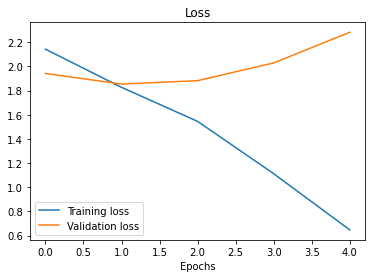

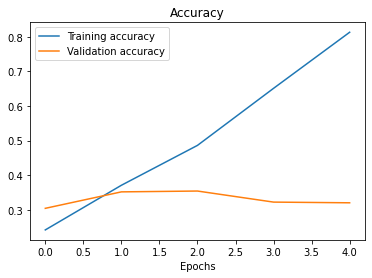

In [84]:
# Plot the loss curves
plot_loss_curves(history_10)

Looks like our "simplifying the model" didn't work, Let's try data augmentation

### Trying to reduce overfitting with data augmentation

In [86]:
# Create ImageDataGenerator for augmented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [87]:
# Create an augmented train dataset
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical",
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [88]:
# Create a new model
model_11 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 136s 573ms/step - loss: 2.1622 - accuracy: 0.2156 - val_loss: 2.0792 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 2.0405 - accuracy: 0.2804 - val_loss: 1.9425 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0007 - accuracy: 0.3004 - val_loss: 1.8850 - val_accuracy: 0.3552
Epoch 4/5
235/235 [==============================] - 123s 523ms/step - loss: 1.9808 - accuracy: 0.3180 - val_loss: 1.8772 - val_accuracy: 0.3596
Epoch 5/5
235/235 [==============================] - 126s 536ms/step - loss: 1.9588 - accuracy: 0.3187 - val_loss: 1.8267 - val_accuracy: 0.3568


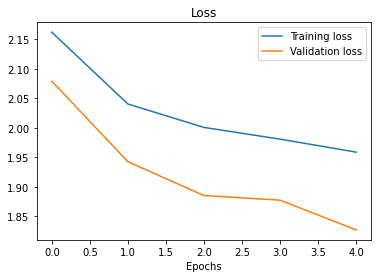

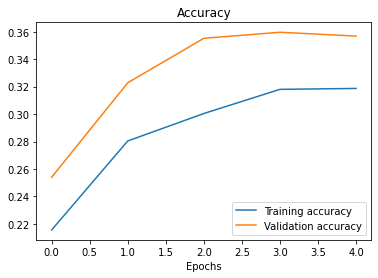

In [89]:
# Check out the loss curves
plot_loss_curves(history_11)

In [91]:
# Create a model
model_12 = tf.keras.models.clone_model(model_11)

# Compile the model
model_12.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 123s 517ms/step - loss: 2.1929 - accuracy: 0.2143 - val_loss: 2.0547 - val_accuracy: 0.2564
Epoch 2/10
235/235 [==============================] - 119s 508ms/step - loss: 2.0399 - accuracy: 0.2823 - val_loss: 1.9067 - val_accuracy: 0.3176
Epoch 3/10
235/235 [==============================] - 119s 508ms/step - loss: 1.9860 - accuracy: 0.3075 - val_loss: 1.8270 - val_accuracy: 0.3696
Epoch 4/10
235/235 [==============================] - 120s 512ms/step - loss: 1.9482 - accuracy: 0.3260 - val_loss: 1.7845 - val_accuracy: 0.3920
Epoch 5/10
235/235 [==============================] - 120s 509ms/step - loss: 1.9141 - accuracy: 0.3336 - val_loss: 1.7096 - val_accuracy: 0.4228
Epoch 6/10
235/235 [==============================] - 120s 512ms/step - loss: 1.8961 - accuracy: 0.3512 - val_loss: 1.7380 - val_accuracy: 0.4068
Epoch 7/10
235/235 [==============================] - 119s 508ms/step - loss: 1.8759 - accuracy: 0.3509 - val_loss: 1.8005 -

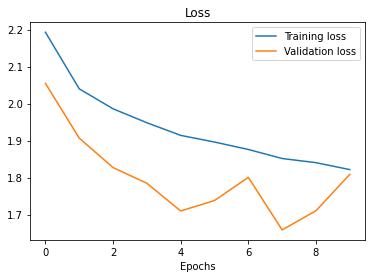

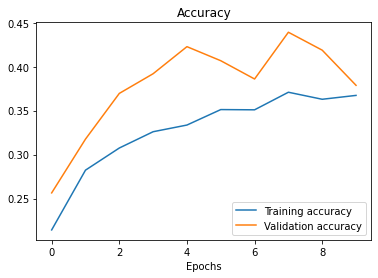

In [92]:
plot_loss_curves(history_12)

### 7. Repeat until satisfied

We could keep going and trying to improve the validation/test accuracy

How?

By running lots of experiments:
- Increase layers/hidden units
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters)
- Train for longer
- Try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [93]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [94]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-05-22 17:18:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.1s    

2022-05-22 17:18:06 (35.3 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-05-22 17:18:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [95]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

hamburger = mpimg.imread("03-hamburger.jpeg")
steak = mpimg.imread("03-steak.jpeg")
sushi = mpimg.imread("03-sushi.jpeg")

In [166]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
    prob = round(pred[0][tf.argmax(pred[0])]*100,2)
  else:
    pred_class = class_names[int(tf.round(pred))]
    if int(tf.round(pred)) == 1:
      prob = round(pred[0,0]*100, 2)
    else:
      prob = round((1 - pred[0,0])*100,2)

  # Plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}, confidence: {prob}%")
  plt.axis(False)

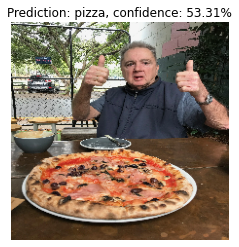

In [167]:
# Make a prediction
pred_and_plot(model=model_7,
              filename="03-pizza-dad.jpeg",
              class_names=['pizza', 'steak'])

### Save the model

Looks like our model didn't perform very well on our custom images because it only achieved 39% on our test data

In [169]:
# Save a model
model_12.save("saved_trained_model_12")

INFO:tensorflow:Assets written to: saved_trained_model_12/assets


In [172]:
# Load in a trained model and evaluate it
loaded_model_12 = tf.keras.models.load_model("saved_trained_model_12")
loaded_model_12.evaluate(test_data)

79/79 [==============================] - 17s 205ms/step - loss: 1.8086 - accuracy: 0.3788


[1.80856192111969, 0.37880000472068787]

In [173]:
# Compare our loaded model to our existing model
model_12.evaluate(test_data)

79/79 [==============================] - 19s 236ms/step - loss: 1.8086 - accuracy: 0.3788


[1.8085625171661377, 0.37880000472068787]

# Exercises